<a href="https://colab.research.google.com/github/KCemOzdemir/DerinOgrenme/blob/main/Fruit360r2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Öncelikle Fruit360 Datasetimizi Drive'a kaydediyoruz daha sonra zipten çıkarıyoruz
# Daha Sonra Klasörün bulunduğu yola erişim sağlıyoruz

import os
os.chdir('/content/drive/MyDrive/Fruit360/fruit3600/fruits-360')

In [16]:
# Kontrol İşlemimizi gerçekleştirelim
!pwd

/content/drive/MyDrive/Fruit360/fruit3600/fruits-360


In [17]:
#Şimdi Pre-Processing Görüntüleme Test ve Eğitim Kısaca Geliştireceğimiz model için kullanacağımız kütüphaneleri implement ediyoruz
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
from glob import glob

In [18]:
#Şimdi train ve test klasörlerine erişelim
train_path = '/content/drive/MyDrive/Fruit360/fruit3600/fruits-360/Training'
test_path = '/content/drive/MyDrive/Fruit360/fruit3600/fruits-360/Test'

<function matplotlib.pyplot.show>

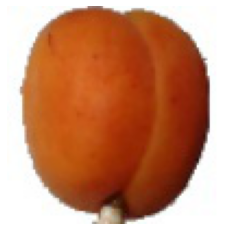

In [19]:
#Pathlere erişimimiz doğru mu kontrol için bakalım
img = load_img(train_path + "/Apricot/0_100.jpg")
plt.imshow(img)
plt.axis('off')
plt.show

In [20]:
#Data Setimizi oluşturan fotoğrafların özelliğine bakalım boyut ve kanal sayısı
x = img_to_array(img)
print("İmage shape : ", x.shape)

İmage shape :  (100, 100, 3)


In [21]:
# Şimdi Class sayımıza bakalım
className = glob(train_path + '/*')
numberOfClass = len(className)
print("Number of class : ", numberOfClass)

Number of class :  103


In [22]:
# Gereken verilere ulaştık şimdi CNN yapımızı kurmaya başlayalım
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = x.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=32, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.50))
model.add(Dense(numberOfClass))
model.add(Activation('softmax'))


In [23]:
#CNN ağımızı görüntüleyelim
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)       

In [24]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 32

In [25]:
#Her classta kaç tane fotoğraf var ? sayısı yeterli mi kontrol edelim data aug. ihiyacımız nedir onu belirleyelim
a = glob(train_path + "/Apricot" + '/*')
aLen = len(a)

howManyImage = aLen * numberOfClass

print(howManyImage)

50676


In [26]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.3, horizontal_flip=True, zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)
train_genetor = train_datagen.flow_from_directory(train_path, target_size = x.shape[:2],batch_size = batch_size,color_mode = "rgb", class_mode = "categorical")
test_genetor = test_datagen.flow_from_directory(test_path, target_size = x.shape[:2],batch_size = batch_size,color_mode = "rgb", class_mode = "categorical")


Found 38548 images belonging to 103 classes.
Found 22688 images belonging to 131 classes.


In [29]:
#Verimiz az bu resimleri çoklamamız lazım sentetik data üreteceğiz
#generator=train_genetor,steps_per_epoch=1600 // batch_size, epochs=100, validation_data=test_genetor, validation_steps = 800 // batch_size


model.fit(train_genetor,steps_per_epoch=320 // batch_size, epochs=25, validation_data=test_genetor, validation_steps=128 // batch_size)

Epoch 1/25
10/10 [==============================] - ETA: 0s - loss: 3.9074 - accuracy: 0.1156 

InvalidArgumentError: ignored